In [11]:
# Import libraries needed
import csv
import sqlite3
import json
import pandas as pd
from sqlalchemy import create_engine, Column, Integer, String, Date, text
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
from datetime import datetime

In [3]:
# made json a csv

with open('Data/rximagesAll.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile, lines=True)

df.to_csv('Data/rximagesAll.csv', encoding='utf-8', index=False)

In [4]:
df_top_10 = df.head(10)
df_top_10

,_id,ndc11,part,rxcui,acqDate,name,labeler,deaSchedule,attribution,mpc,...,nlmImageSize600,rxnavImageSize300,nlmImageSize300,rxnavImageSize120,nlmImageSize120,relabelersNdc9,status,splSetId,splRootId,splVersion
0,{'$oid': '5a32f687eb4525ea9e82bee3'},63459-0502-30,1,261106,09-26-2013,Fentanyl 0.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,"{'shape': 'BULLET', 'size': 19, 'color': 'WHIT...",...,55054.0,26586,17477.0,4516,3643.0,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5a32f687eb4525ea9e82bee4'},63459-0504-30,1,262219,09-26-2013,Fentanyl 0.4 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,"{'shape': 'BULLET', 'size': 19, 'color': 'WHIT...",...,55793.0,26739,17645.0,4617,3726.0,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5a32f687eb4525ea9e82bee5'},63459-0506-30,1,261107,09-26-2013,Fentanyl 0.6 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,"{'shape': 'BULLET', 'size': 19, 'color': 'WHIT...",...,57579.0,27285,18274.0,4686,3895.0,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5a32f687eb4525ea9e82bee6'},63459-0508-30,1,261108,09-26-2013,Fentanyl 0.8 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,"{'shape': 'BULLET', 'size': 19, 'color': 'WHIT...",...,55495.0,27041,17932.0,4558,3704.0,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5a32f687eb4525ea9e82bee7'},63459-0512-30,1,261109,09-26-2013,Fentanyl 1.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,"{'shape': 'BULLET', 'size': 19, 'color': 'WHIT...",...,56360.0,26954,17943.0,4641,3766.0,NaN,NaN,NaN,NaN,NaN
5,{'$oid': '5a32f687eb4525ea9e82bee8'},63459-0516-30,1,261110,09-26-2013,Fentanyl 1.6 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,"{'shape': 'BULLET', 'size': 19, 'color': 'WHIT...",...,56536.0,26906,17890.0,4617,3779.0,NaN,NaN,NaN,NaN,NaN
6,{'$oid': '5a32f688eb4525ea9e82bee9'},00093-0311-01,1,978006,11-05-2009,Loperamide Hydrochloride 2 MG Oral Capsule,Teva Pharmaceuticals USA Inc,NaN,National Library of Medicine | Lister Hill Nat...,"{'shape': 'CAPSULE', 'size': 14, 'color': 'BRO...",...,69417.0,30889,21618.0,6289,5556.0,"[{'@sourceNdc9': '00093-0311', 'ndc9': ['16590...",Former imprint,NaN,NaN,NaN
7,{'$oid': '5a32f688eb4525ea9e82beea'},00093-3165-01,1,197985,12-02-2009,Minocycline 50 MG Oral Capsule,Teva Pharmaceuticals USA Inc,NaN,National Library of Medicine | Lister Hill Nat...,"{'shape': 'CAPSULE', 'size': 16, 'color': 'PIN...",...,55548.0,28417,18655.0,5868,5151.0,"[{'@sourceNdc9': '00093-3165', 'ndc9': ['55154...",Former imprint,NaN,NaN,NaN
8,{'$oid': '5a32f688eb4525ea9e82beeb'},00093-0810-01,1,198045,12-02-2009,Nortriptyline 10 MG Oral Capsule,Teva Pharmaceuticals USA Inc,NaN,National Library of Medicine | Lister Hill Nat...,"{'shape': 'CAPSULE', 'size': 16, 'color': 'WHI...",...,60149.0,29305,20145.0,6225,5564.0,"[{'@sourceNdc9': '00093-0810', 'ndc9': ['58118...",Former imprint,NaN,NaN,NaN
9,{'$oid': '5a32f688eb4525ea9e82beec'},00093-0811-01,1,317136,12-02-2009,Nortriptyline 25 MG Oral Capsule,Teva Pharmaceuticals USA Inc,NaN,National Library of Medicine | Lister Hill Nat...,"{'shape': 'CAPSULE', 'size': 14, 'color': 'WHI...",...,77865.0,28872,26431.0,6067,7227.0,"[{'@sourceNdc9': '00093-0811', 'ndc9': ['33261...",Former imprint,NaN,NaN,NaN


In [5]:
df.drop(columns = ['_id', 'mpc', 'ingredients', 'relabelersNdc9'], inplace=True)

In [6]:
df.shape

(4392, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ndc11                 4392 non-null   object 
 1   part                  4392 non-null   int64  
 2   rxcui                 4392 non-null   int64  
 3   acqDate               4388 non-null   object 
 4   name                  4392 non-null   object 
 5   labeler               4392 non-null   object 
 6   deaSchedule           170 non-null    object 
 7   attribution           4392 non-null   object 
 8   ingredientsAvailable  4392 non-null   bool   
 9   rxnavImageObjectId    4392 non-null   int64  
 10  rxnavImageFileName    4392 non-null   object 
 11  rxnavImageSize        4392 non-null   int64  
 12  nlmImageObjectId      4392 non-null   int64  
 13  nlmImageFileName      4392 non-null   object 
 14  nlmImageSize          4392 non-null   int64  
 15  rxnavImageSizeFull   

In [10]:
df.head()

,ndc11,part,rxcui,acqDate,name,labeler,deaSchedule,attribution,ingredientsAvailable,rxnavImageObjectId,...,rxnavImageSize600,nlmImageSize600,rxnavImageSize300,nlmImageSize300,rxnavImageSize120,nlmImageSize120,status,splSetId,splRootId,splVersion
0,63459-0502-30,1,261106,09-26-2013,Fentanyl 0.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,False,185688930,...,85745,55054.0,26586,17477.0,4516,3643.0,NaN,NaN,NaN,NaN
1,63459-0504-30,1,262219,09-26-2013,Fentanyl 0.4 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,False,185688934,...,86288,55793.0,26739,17645.0,4617,3726.0,NaN,NaN,NaN,NaN
2,63459-0506-30,1,261107,09-26-2013,Fentanyl 0.6 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,False,185688937,...,88045,57579.0,27285,18274.0,4686,3895.0,NaN,NaN,NaN,NaN
3,63459-0508-30,1,261108,09-26-2013,Fentanyl 0.8 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,False,185688938,...,85961,55495.0,27041,17932.0,4558,3704.0,NaN,NaN,NaN,NaN
4,63459-0512-30,1,261109,09-26-2013,Fentanyl 1.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII,National Library of Medicine | Lister Hill Nat...,False,185688940,...,87048,56360.0,26954,17943.0,4641,3766.0,NaN,NaN,NaN,NaN


In [8]:
engine = create_engine('sqlite:///pill_predictions.db', echo=False)

In [9]:
df.to_sql(name='users3', con=engine)

with engine.connect() as conn:
   conn.execute(text("SELECT * FROM users3")).fetchall()

In [11]:
# Create session for database
Session = sessionmaker(bind=engine)
session = Session()

In [12]:
# Close session
session.close()

In [12]:
db_file = "pill_predictions.db"
conn = sqlite3.connect(db_file)

In [57]:
query = "SELECT * from users3"
df = pd.read_sql(query, conn)
new_df = df[["name", "labeler", "deaSchedule"]]
new_df

,name,labeler,deaSchedule
0,Fentanyl 0.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII
1,Fentanyl 0.4 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII
2,Fentanyl 0.6 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII
3,Fentanyl 0.8 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII
4,Fentanyl 1.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",CII
...,...,...,...
4387,Sumatriptan 25 MG Oral Tablet,Northstar RxLLC,None
4388,Sumatriptan 100 MG Oral Tablet,Northstar RxLLC,None
4389,Sumatriptan 50 MG Oral Tablet,Northstar RxLLC,None
4390,Sumatriptan 100 MG Oral Tablet [Imitrex],GlaxoSmithKline LLC,None


In [61]:
new_df["name"].value_counts

                                                             60
pantoprazole 40 MG Delayed Release Oral Tablet               10
Lisinopril 5 MG Oral Tablet                                   9
Lisinopril 20 MG Oral Tablet                                  9
Simvastatin 5 MG Oral Tablet                                  9
                                                             ..
ezetimibe 10 MG / Simvastatin 40 MG Oral Tablet [Vytorin]     1
raltegravir 400 MG Oral Tablet [Isentress]                    1
Colesevelam hydrochloride 625 MG Oral Tablet [Welchol]        1
ezetimibe 10 MG / Simvastatin 20 MG Oral Tablet [Vytorin]     1
Sumatriptan 100 MG Oral Tablet [Imitrex]                      1
Name: name, Length: 2112, dtype: int64

In [82]:
# plt.plot(new_df["name"].value_counts())
# plt.show()

In [83]:
# df1 = df.nunique()
# df1

# df1 = df1.to_frame().T
# df1

C:\Users\tj_da\AppData\Local\Temp\ipykernel_7868\3049663794.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1.columns, rotation=45, ha="right")


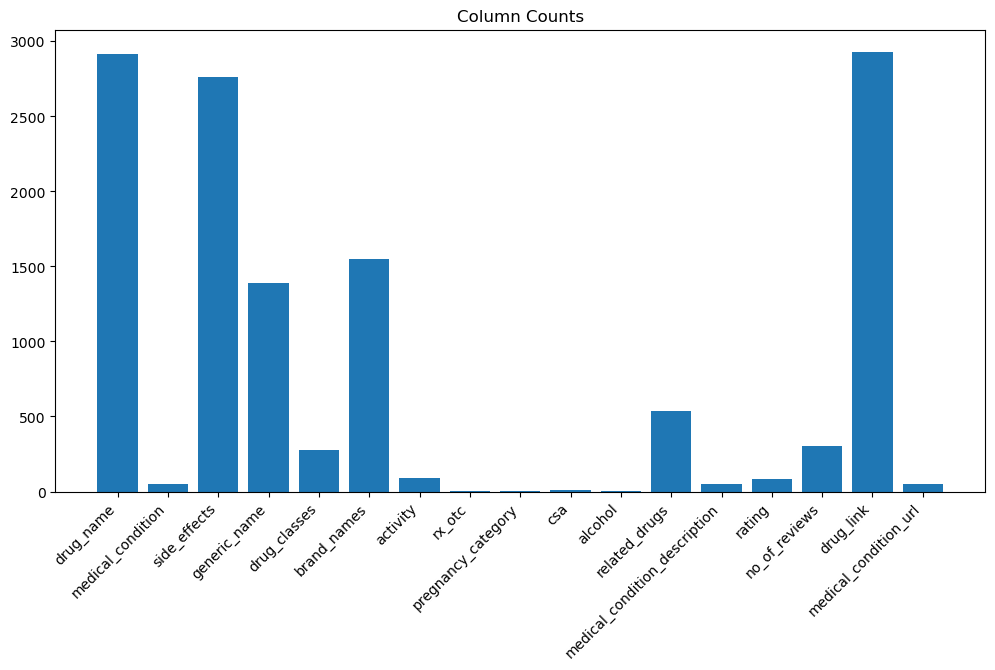

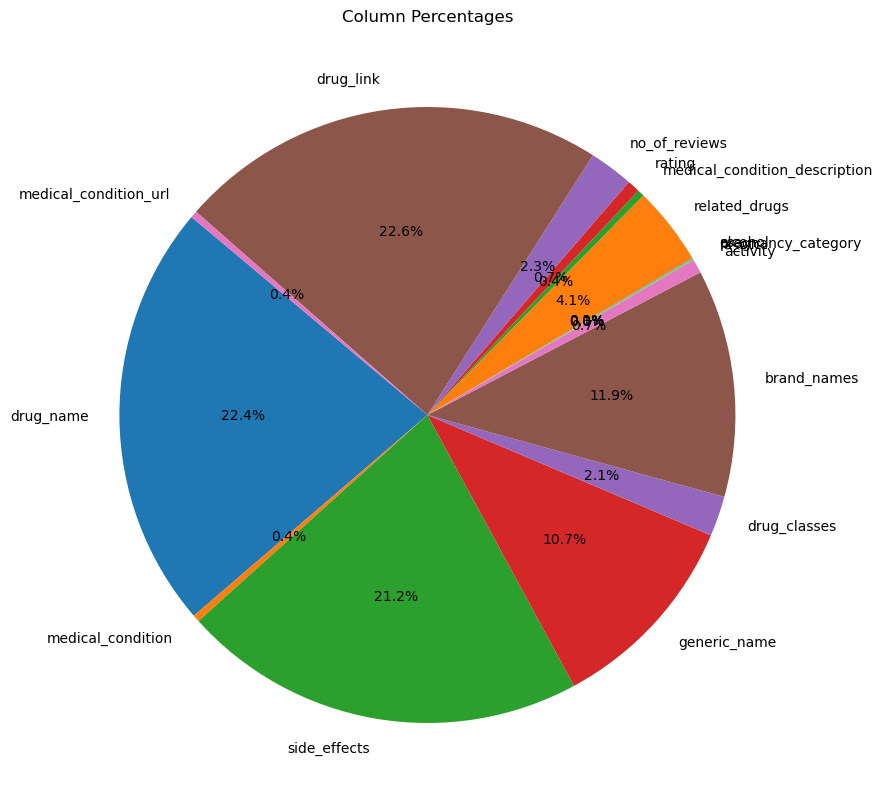

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


# Set up the figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for column counts
ax.bar(df1.columns, df1.iloc[0])
ax.set_xticklabels(df1.columns, rotation=45, ha="right")
ax.set_title('Column Counts')

plt.show()

# Set up the figure and axes for the pie chart
fig, ax = plt.subplots(figsize=(10, 10))

# Pie chart for column percentages
ax.pie(df1.iloc[0], labels=df1.columns, autopct='%1.1f%%', startangle=140)
ax.set_title('Column Percentages')

plt.show()

In [31]:
import pandas as pd
import sqlite3
from PIL import Image
import io

# Connect to the SQLite database
db_file = 'pill_predictions.db'
conn = sqlite3.connect(db_file)

# Query the image data from the database
query = 'SELECT image_column_name FROM your_table_name WHERE condition;'
image_data = conn.execute(query).fetchone()[0]  # Assuming only one row is selected

# Close the database connection
conn.close()

# Convert the binary image data to an image
image = Image.open(io.BytesIO(image_data))

# Display the image
image.show()


OperationalError: no such table: your_table_name

In [70]:
df = pd.read_csv("Data/drugs_side_effects_drugs_com.csv")

In [71]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [72]:
df.info()
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(df.any())
# list all duplicate rows

print("Duplicate Rows",df[dups])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [73]:
# Data Cleaning¶
# Drop unwanted columns(not relevant for our model)
df = df.drop(['no_of_reviews', 'drug_link','medical_condition_url',"related_drugs"], axis = 1)
df.shape

(2931, 13)

Rx        1998
Rx/OTC     604
OTC        328
Name: rx_otc, dtype: int64

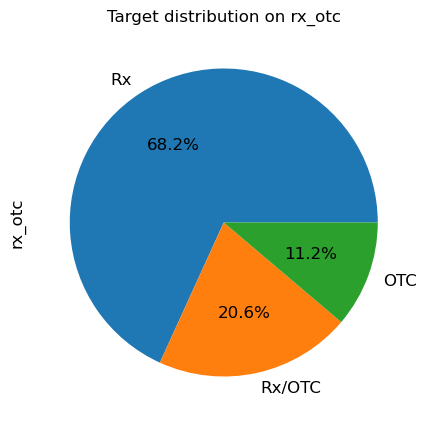

In [76]:
import seaborn as sns

#figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))

#Pie Plot
df['rx_otc'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on rx_otc")

df['rx_otc'].value_counts()

In [84]:
#Pie Plot
# df['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition")
top10_medicalCondition_df = df['medical_condition'].value_counts().head(10)
top10_medicalCondition_df

Pain                 264
Colds & Flu          245
Acne                 238
Hypertension         177
Osteoarthritis       129
Hayfever             124
Eczema               122
AIDS/HIV             109
Diabetes (Type 2)    104
Psoriasis             93
Name: medical_condition, dtype: int64

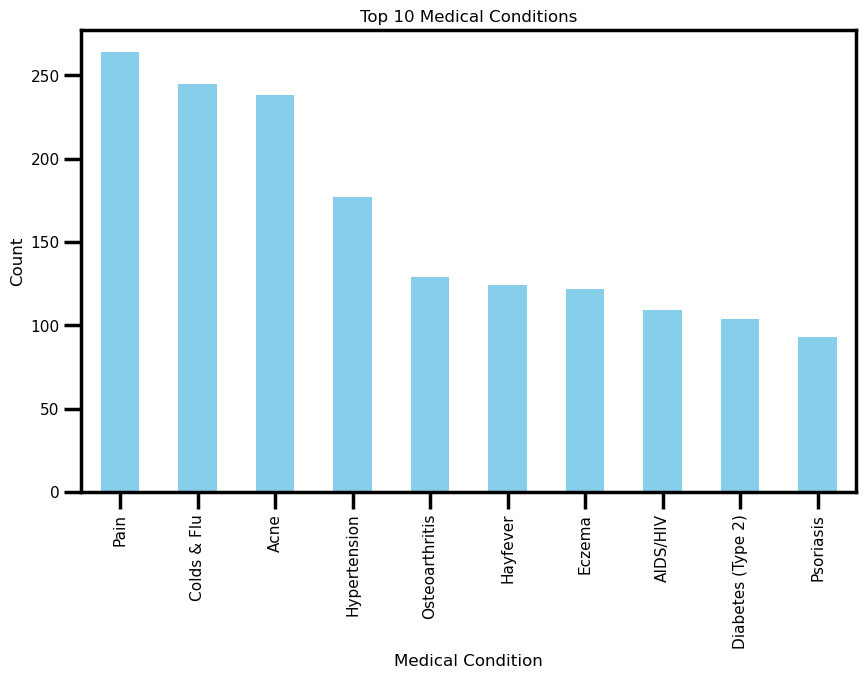

In [81]:
plt.figure(figsize=(10, 6))
top10_medicalCondition_df.plot(kind='bar', color='skyblue')
plt.title('Top 10 Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define base class for SQLAlchemy model
# Base = declarative_base()

In [ ]:
# Define structures
# class Predictions(Base):
    #__tablename__ = 'pill_combined_test'  

    # Define columns for the table
    # image_ID = Column(String, primary_key=True)
    # image_size_120 = Column(Integer)
    # image_size_300 = Column(Integer)
    # image_size_600 = Column(Integer)
    #image_size_800 = Column(Integer)
    # image_size_1024 = Column(Integer)
    # image_size_original = Column(Integer)

In [ ]:
# SQLite database path
# db_path = 'sqlite:///predictions.db'
# engine = create_engine(db_path)

In [ ]:
# Create tables
# Base.metadata.create_all(engine)

In [ ]:
# Create a session for the database
# Session = sessionmaker(bind=engine)
# session = Session()

In [ ]:
# Upload data from 'rximagesAll'
# with open('rximagesAll.csv', 'r') as file:
    # csv_reader = csv.DictReader(file)
    # for row in csv_reader:
        # data = Predictions(
            # image_ID = row['_id'],
            # image_size_120 = row["rxnavImageSize120"],
            # image_size_300 = row["rxnavImageSize300"],
            # image_size_600 = row["rxnavImageSize600"],
            # image_size_800 = row["rxnavImageSize800"],
            # image_size_1024 = row["rxnavImageSize1024"],
            # image_size_original = row["rxnavImageSizeFull"]
        # )
        
        # session.add(data)

In [ ]:
# Commit the changes to the database
# session.commit()